# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Getting the data

In [2]:
# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
# get the data from txt files to pandas dataframe
samsung_train = pd.read_csv('samsung_train.txt', delim_whitespace=True, header=None)
samsung_train.columns = [features]
samsung_test = pd.read_csv('samsung_test.txt', delim_whitespace=True, header=None)
samsung_test.columns = [features]

# get the labels from txt files to pandas dataframe
samsung_train_labels = pd.read_csv('samsung_train_labels.txt', delim_whitespace=True, header=None)
samsung_train_labels.columns = ['activity']

samsung_test_labels = pd.read_csv('samsung_test_labels.txt', delim_whitespace=True, header=None)
samsung_test_labels.columns = ['activity']

In [4]:
samsung_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
samsung_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [6]:
print('Trainig set shape:',samsung_train.shape)
print('Test set shape: ',samsung_test.shape)

Trainig set shape: (7352, 561)
Test set shape:  (2947, 561)


# Data Cleaning

In [7]:
# checking for duplicates
samsung_train.duplicated().sum()

0

In [8]:
# checking for NaN values
samsung_train.isna().values.sum()

0

# Data Scaling

In [9]:
scaler = StandardScaler()
scaled_samsung_train = scaler.fit_transform(samsung_train)
scaled_samsung_train = pd.DataFrame(data=scaled_samsung_train)

scaled_samsung_test = scaler.fit_transform(samsung_test)
scaled_samsung_test = pd.DataFrame(data=scaled_samsung_test) 

display(scaled_samsung_train.head())
display(scaled_samsung_test.head())

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.277708,-0.210631,2.193076,-0.787267,-0.833212,-0.093444,-0.808091,-0.839013,-0.104178,-0.824746,...,-0.253663,-0.166391,-0.344765,0.003566,0.357573,-1.363900,0.575487,-0.404790,0.622723,-0.038348
1,0.198660,0.182591,-0.250264,-0.876984,-0.929061,-0.858050,-0.897145,-0.928949,-0.863269,-0.824746,...,-2.300750,0.491021,0.012257,-0.264092,0.030787,-0.747232,1.871192,-0.361739,0.636731,-0.145709
2,0.024587,-0.318055,-0.228485,-0.921598,-0.934054,-0.907107,-0.916891,-0.933813,-0.912639,-0.910982,...,-0.291563,0.274821,-0.134989,-0.119671,0.446072,0.037919,0.323938,-0.370932,0.632845,-0.126855
3,-0.061057,-0.573037,-0.213709,-0.923837,-0.940817,-0.919082,-0.919152,-0.941599,-0.927776,-0.909740,...,-0.058625,-0.210678,-0.441714,-0.066443,0.338512,0.472695,0.625874,-0.363434,0.645276,-0.117585
4,0.013823,-0.387881,-0.494639,-0.921679,-0.929036,-0.949979,-0.916133,-0.923846,-0.951396,-0.909740,...,-1.090781,-0.810527,-0.796939,-0.022276,-0.098529,1.097348,-0.201999,-0.350256,0.665657,-0.104118


# PCA

In [10]:
pca = PCA(n_components=10, random_state=42)
samsung_train_pca = pca.fit_transform(scaled_samsung_train)
samsung_train_pca_df = pd.DataFrame(samsung_train_pca)
samsung_train_pca_df.rename(columns = {0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4', 4: 'PC5',
                            5:'PC6', 6:'PC7', 7:'PC8', 8:'PC9', 9:'PC10'},
                  inplace=True)

samsung_train_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-16.138544,2.152024,3.144782,-0.272493,6.798832,-4.249598,2.935058,-4.902593,-0.793348,-3.640814
1,-15.296194,1.387144,-0.682215,2.813668,4.266031,-2.055822,0.010857,-1.845513,0.489237,-0.190350
2,-15.137019,2.473351,-1.756642,3.717974,4.181526,-1.357512,0.073275,-1.388524,0.536123,-0.677524
3,-15.350884,3.915681,-1.790331,2.567511,3.205860,-0.942903,0.530939,-1.831892,1.061071,-1.499974
4,-15.544814,4.598737,-2.188578,2.897586,3.080122,-1.061453,-1.048459,-0.818155,0.609807,1.119948
...,...,...,...,...,...,...,...,...,...,...
7347,15.465060,-12.536306,1.999177,3.457734,-1.523375,-2.699463,-3.561303,2.419230,0.381741,1.312668
7348,14.222722,-10.253501,2.377659,2.802663,-1.325472,-4.346403,-2.194490,0.032928,-0.535719,0.702650
7349,14.333436,-12.260712,4.025969,3.849792,-2.861004,-3.624963,-3.930555,-0.870321,-0.729258,-1.565950
7350,12.876019,-14.071256,2.916069,5.013432,-3.938387,-2.137841,-5.390637,0.321473,-0.903674,-1.645038


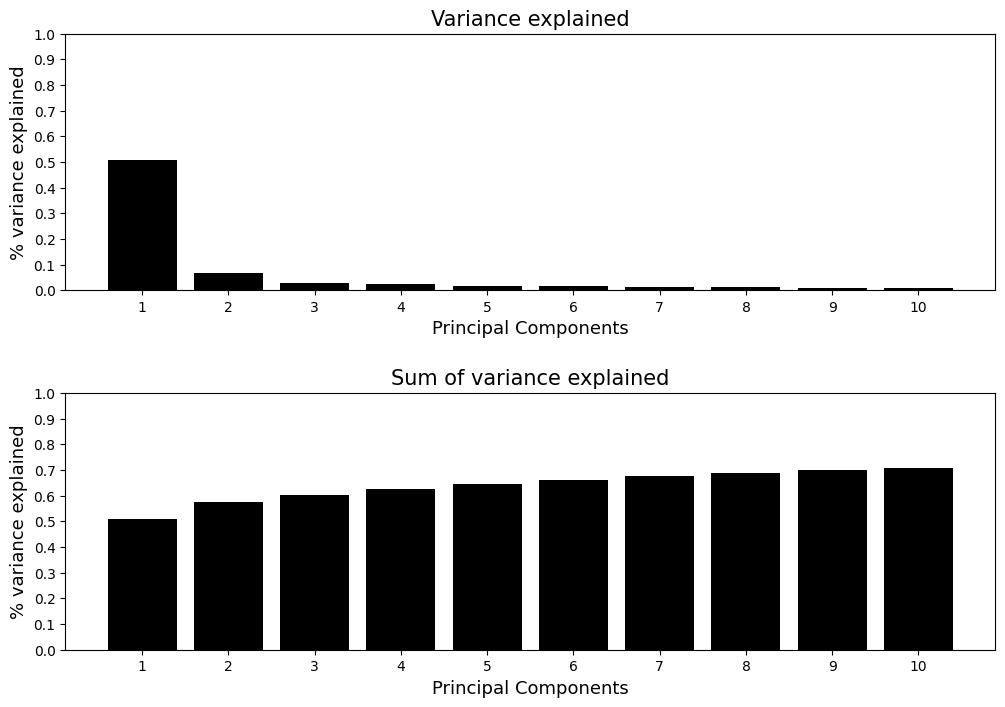

Principal component: 1, Variance explained: 0.50781, Sum of explained variance: 0.50781
Principal component: 2, Variance explained: 0.06581, Sum of explained variance: 0.57362
Principal component: 3, Variance explained: 0.02806, Sum of explained variance: 0.60168
Principal component: 4, Variance explained: 0.02504, Sum of explained variance: 0.62672
Principal component: 5, Variance explained: 0.01888, Sum of explained variance: 0.64561
Principal component: 6, Variance explained: 0.01724, Sum of explained variance: 0.66285
Principal component: 7, Variance explained: 0.01371, Sum of explained variance: 0.67656
Principal component: 8, Variance explained: 0.01199, Sum of explained variance: 0.68855
Principal component: 9, Variance explained: 0.00996, Sum of explained variance: 0.6985
Principal component: 10, Variance explained: 0.00965, Sum of explained variance: 0.70816


In [11]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Variance explained', fontsize=15)
plt.xlabel('Principal Components', fontsize=13)
plt.ylabel('% variance explained', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Sum of variance explained', fontsize=15)
plt.xlabel('Principal Components', fontsize=13)
plt.ylabel('% variance explained', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Principal component: {principal_component}, Variance explained: {np.round(explained_var, 5)}, Sum of explained variance: {np.round(cum_explained_var, 5)}')
    principal_component += 1

PCA for 10 principal compoments deprives dataset of almost 30% of variance. Legitimacy of use PCA is questionable. However, it can be compared to data that wasn't analyzed for principal components, to check how 30% variance loss impact model performance. Also further decreasing dataset to two first principal components can be useful for data visualisation.

In [12]:
samsung_train_pca_df_PC2 = samsung_train_pca_df[['PC1','PC2']]
samsung_train_pca_df_PC2

,PC1,PC2
0,-16.138544,2.152024
1,-15.296194,1.387144
2,-15.137019,2.473351
3,-15.350884,3.915681
4,-15.544814,4.598737
...,...,...
7347,15.465060,-12.536306
7348,14.222722,-10.253501
7349,14.333436,-12.260712
7350,12.876019,-14.071256


# Modeling

# KMeans

In [13]:
# Searching for perfect clusters number

# creating 19 algorithms with k from 2 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(scaled_samsung_train)
    for k in range(2, 20) 
]

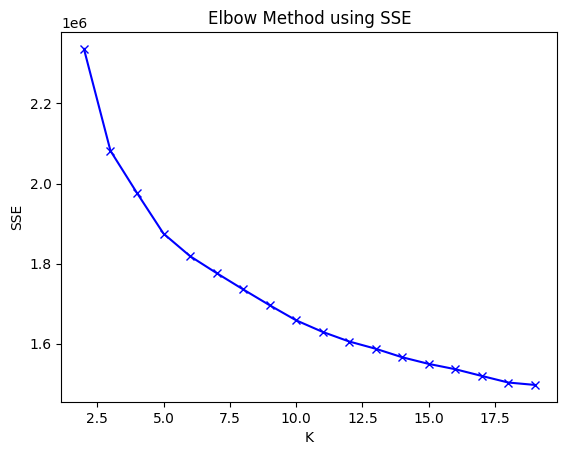

In [14]:
# elbow plot
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

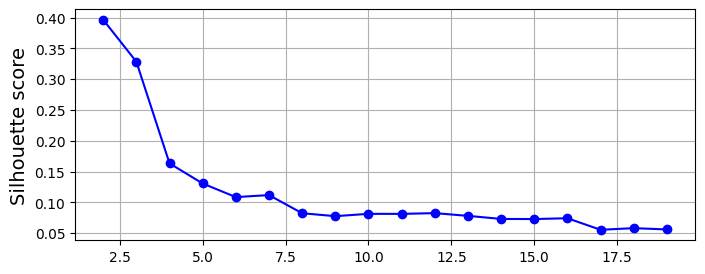

In [15]:
# silhouette scores plot

silhouette_scores = [
    silhouette_score(scaled_samsung_train, model.labels_)
    for model in kmeans_per_k
]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In this case silhouette score plot tells bit more about possible perfect number of clusters than elbow plot. There is a little growth between 5.0 and 7.5, so number of clusters should be picked from this range. For this dataset accurate number of components is known and equals 6.

In [16]:
# creating KMeans classificators for different datasets

# scaled data
km = KMeans(init="random", n_clusters=6)
km.fit(scaled_samsung_train)

# scaled data with PCA
km_pca = KMeans(init="random", n_clusters=6)
km_pca.fit(samsung_train_pca_df)

# scaled data brought to 2 principal components
km_pca2 = KMeans(init="random", n_clusters=6)
km_pca2.fit(samsung_train_pca_df_PC2)

print('Predicted clusters for scaled dataset:                               ',km.labels_[50:70])
print('Predicted clusters for scaled dataset with PCA:                      ',km_pca.labels_[50:70])
print('Predicted clusters for scaled dataset with two principal components: ',km_pca2.labels_[50:70])

Predicted clusters for scaled dataset:                                [0 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3]
Predicted clusters for scaled dataset with PCA:                       [1 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0]
Predicted clusters for scaled dataset with two principal components:  [3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 2 1 2]


Predicted clusters are somehow similar (numbers are different, but they appear at the same range). KMeans for data brought to 2 principal components seems to cope worse.

# KMeans visualisation for two dimensional dataset

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=1, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
  
    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

     
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

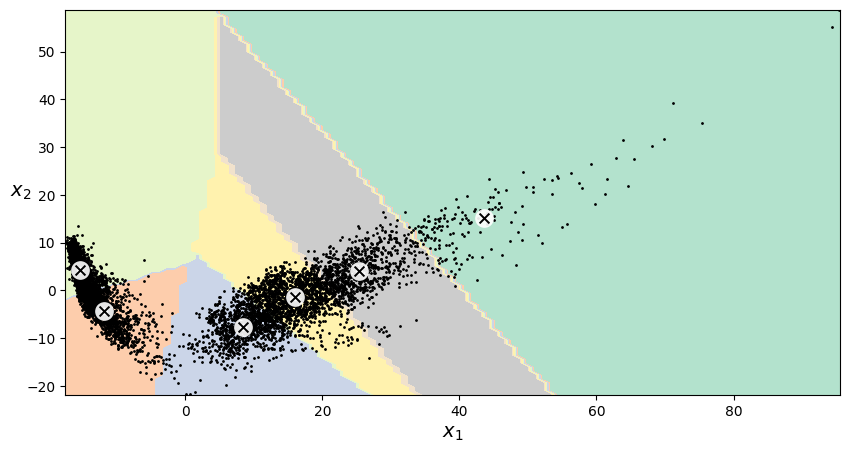

In [18]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(km_pca2, samsung_train_pca_df_PC2.values)
plt.show()

# DBSCAN

In [19]:
# creating DBSCAN classificators for different datasets

dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan.fit(scaled_samsung_train)


dbscan_pca = DBSCAN(eps=1.3, min_samples=5)
dbscan_pca.fit(samsung_train_pca_df)


dbscan_pca2 = DBSCAN(eps=1.3, min_samples=5)
dbscan_pca2.fit(samsung_train_pca_df_PC2)


print('Predicted clusters for scaled dataset:                               ',dbscan.labels_[:18])
print('Predicted clusters for scaled dataset with PCA:                      ',dbscan_pca.labels_[:18])
print('Predicted clusters for scaled dataset with two principal components: ',dbscan_pca2.labels_[:18])

Predicted clusters for scaled dataset:                                [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Predicted clusters for scaled dataset with PCA:                       [-1 -1 -1 -1  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Predicted clusters for scaled dataset with two principal components:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


It is impossible to draw any conclusion.

# DBSCAN visualisation for two dimensional dataset

In [20]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

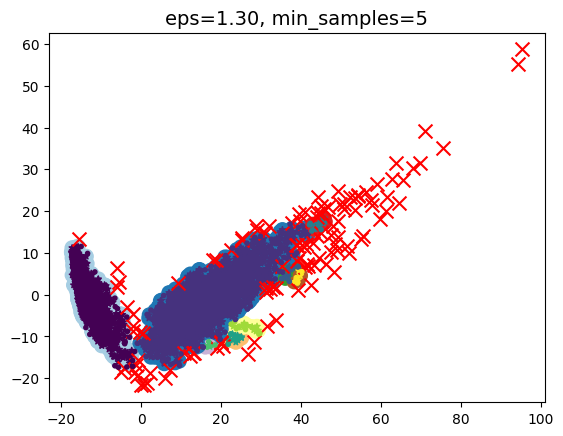

In [21]:
plot_dbscan(dbscan_pca2, samsung_train_pca_df_PC2.values, size=100)

# Gaussian Mixture

In [22]:
# creating GaussianMixture classificators for different datasets

gm = GaussianMixture(n_components=6, n_init=10, random_state=42,covariance_type='tied')
gm.fit(scaled_samsung_train)

gm_pca = GaussianMixture(n_components=6, n_init=10, random_state=42,covariance_type='tied')
gm_pca.fit(samsung_train_pca_df)


gm_pca2 = GaussianMixture(n_components=6, n_init=10, random_state=42,covariance_type='tied')
gm_pca2.fit(samsung_train_pca_df_PC2)


print('Predicted clusters for scaled dataset:                                ',gm.predict(scaled_samsung_train)[50:70])
print('Predicted clusters for scaled dataset with PCA:                       ',gm_pca.predict(samsung_train_pca_df)[50:70])
print('Predicted clusters for scaled dataset with two principal components:: ',gm_pca2.predict(samsung_train_pca_df_PC2)[50:70])



Predicted clusters for scaled dataset:                                 [1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3]
Predicted clusters for scaled dataset with PCA:                        [0 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4 4]
Predicted clusters for scaled dataset with two principal components::  [2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 4 1 1]


Just like in KMeans models clusters are somehow similar (numbers are different, but they appear at the same range).

# Gaussian Mixture visualisation for two dimensional dataset

In [23]:
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

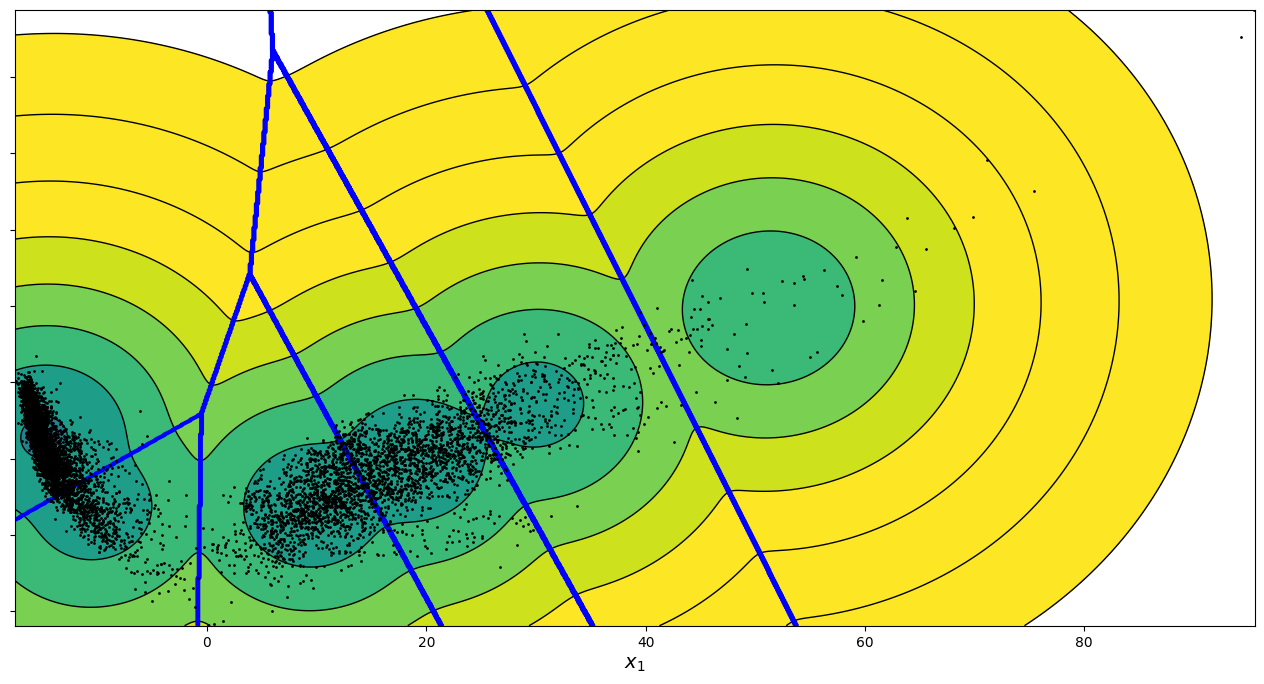

In [24]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm_pca2, samsung_train_pca_df_PC2.values)
plt.show()

# Visualisation of labeled data for two dimensional dataset 

Clusters assigned by trained models can be compared with visual representation of labeled data.

In [25]:
# adding labels to scaled dataset with two principal components

PC2_labeled = pd.concat([samsung_train_pca_df_PC2, samsung_train_labels], axis=1)
PC2_labeled

,PC1,PC2,activity
0,-16.138544,2.152024,5
1,-15.296194,1.387144,5
2,-15.137019,2.473351,5
3,-15.350884,3.915681,5
4,-15.544814,4.598737,5
...,...,...,...
7347,15.465060,-12.536306,2
7348,14.222722,-10.253501,2
7349,14.333436,-12.260712,2
7350,12.876019,-14.071256,2


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

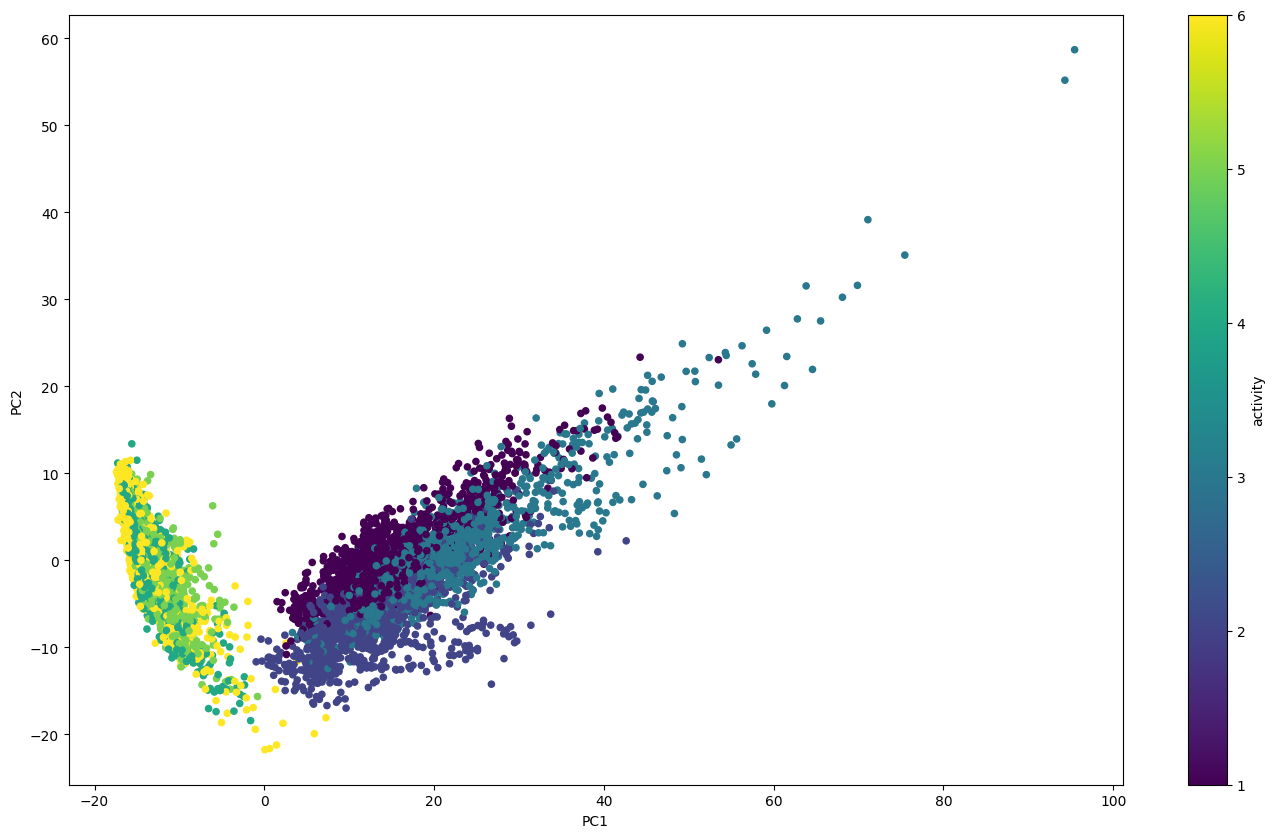

In [26]:
# plotting the data

PC2_labeled.plot.scatter(x='PC1',y='PC2',c='activity',colormap='viridis',figsize=(17,10))

1 is walking

2 is walking upstairs

3 is walking downstairs

4 is sitting

5 is standing

6 is laying


We can extract two compactions of data - the left one, where sitting, standing and laying are grouped, and the right one, where walking, walking upstairs and walking downstairs are grouped.

All of the trained models tried to assign maximum two separatable clusters in the left side of data, while labeled plot shows, that there are actually three clusters with no specific boundries.

Models performed better predictions for walking, walking upstairs and walking downstairs, however models assumned that there must be minimum 4 clusters. True clusters are also deployed different from what models predicted.

# Preprocessing with KMeans

In [27]:
# creating full dataset

samsung_train_labeled = pd.concat([scaled_samsung_train, samsung_train_labels], axis=1)
samsung_test_labeled = pd.concat([scaled_samsung_test, samsung_test_labels], axis=1)
samsung_labeled = pd.concat([samsung_train_labeled, samsung_test_labeled], axis=0)

samsung_labeled

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.597072,-1.380212,0.217067,0.789690,0.744135,1.154623,0.740507,0.779257,1.132204,1.235951,...,-0.311121,-0.488935,-1.019623,0.769650,1.330760,-1.359840,-0.270682,0.616018,0.967186,2
2943,1.476032,-0.829444,0.057817,0.747216,1.085580,1.206230,0.695181,1.026724,1.025466,1.235951,...,-0.135013,-0.326438,-2.207635,-0.846487,-1.098551,0.678029,-0.277456,0.612784,0.957360,2
2944,1.254458,1.862441,-0.173180,0.688432,0.943345,1.057851,0.657591,0.811598,0.810778,0.896354,...,0.500453,0.423089,-0.555875,0.190504,1.034263,0.759011,-0.277802,0.615561,0.952271,2
2945,-0.601088,1.411385,0.278129,0.704246,0.563664,1.175343,0.646262,0.506579,0.971675,0.896354,...,0.227458,-0.061034,1.307070,-1.849401,1.400679,0.017755,-0.286369,0.585654,0.978695,2


In [28]:
X = samsung_labeled.drop('activity', axis=1)
y = samsung_labeled['activity']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=2, stratify=y)

# training Logistic Regression without preprocessing
log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Logistic Regression without KMeans :", log_reg.score(X_test, y_test),'\n')

# training KNeighbours without preprocessing
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("KNN without KMeans :", knn.score(X_test, y_test),'\n\n')


# training Logistic Regression with preprocessing
pipeline_log_reg = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        random_state=2
    )),
    ("log_reg", LogisticRegression(
        multi_class="ovr",
        max_iter=5000,
        random_state=2
    )),
])
pipeline_log_reg.fit(X_train, y_train)

print("Logistic Regression with KMeans :", pipeline_log_reg.score(X_test, y_test),'\n')


# training KNeighbours with preprocessing
pipeline_knn = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        random_state=2
    )),
    ("knn", KNeighborsClassifier(
        n_neighbors=5
    )),
])
pipeline_knn.fit(X_train, y_train)

print("KNN with KMeans :", pipeline_knn.score(X_test, y_test))

Logistic Regression without KMeans : 0.9840776699029126 

KNN without KMeans : 0.9607766990291262 


Logistic Regression with KMeans : 0.9339805825242719 

KNN with KMeans : 0.8396116504854368


Preprocessing was supposed to help :) But it didn't.

# Difference between K-Means, K-fold and K Nearest Neighbours

The K-Means algorithm is capable of clustering unlabeled data (unsupervised learning).

K-fold is used to cross-validation.

K Nearest Neighbours is one of classification algorithims in supervised learning.